## Metrics To Evaluate Machine Learning Algorithms

The metrics that you choose to evaluate your machine learning algorithms with are very important. Choice of metrics influences how the performance of machine learning algorithms is measured and compared. They influence how you weight the importance of different characteristics in the results and ultimately the algorithm to choose.

For classification metrics, we use the Pima Indians diabetes dataset.



### Classification Metrics

**Classification accuracy** is the number of correct predictions made as a ratio of all predictions made. Below is an example of calculating classification accuracy.

In [13]:
# Cross Validation Classification Accuracy
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
url = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

# Accuracy: 0.771 (0.051) 
# accuracy is the ratio of correctly predicted observation to the total observations.
# performance metric for classification problems where the classes are balanced (e.g. same number of observations in each class).
# the model performance is good, but not great. The mean accuracy is 77.1% with a standard deviation of 5.1%.


Accuracy: 0.771 (0.051)


**Logistic loss (or log loss)** is a performance metric for evaluating the predictions of probabilities of membership to a given class. Below is an example of calculating log loss for Logistic regression predictions on the Pima Indians onset of diabetes dataset. The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. (Smaller log loss is better with 0 representing a perfect log loss.)


In [14]:
# Cross Validation Classification LogLoss
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
url = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
model = LogisticRegression(solver='liblinear')
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

# Logloss: -0.493 (0.047)
# log loss is a performance metric for evaluating the predictions of probabilities of membership to a given class.
# the model performance is good, but not great. The mean log loss is 0.493 with a standard deviation of 0.047.



Logloss: -0.494 (0.042)


Area Under **ROC Curve** (or ROC AUC for short) is a performance metric for binary classification problems.The example below provides a demonstration of calculating AUC. The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.



AUC: 0.824  (0.052) 


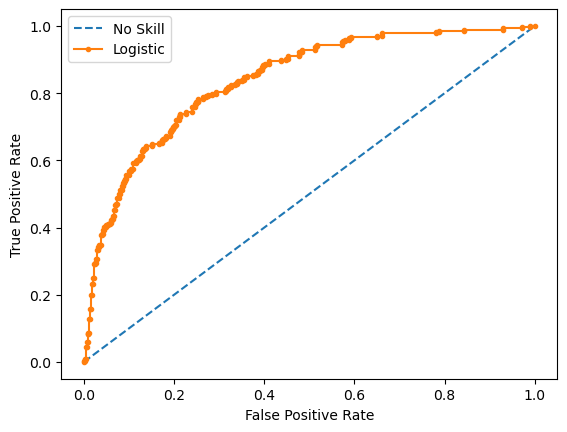

In [15]:
# Cross Validation Classification ROC AUC
import warnings
warnings.filterwarnings('ignore')

import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import roc_curve

url = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
model = LogisticRegression()
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: %.3f " % results.mean(), "(%.3f) " % results.std())

model.fit(X, Y)
# predict probabilities
yhat = model.predict_proba(X)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# the performance of the model is good, but not great. The mean AUC is 0.824 with a standard deviation of 0.052.


You can see the the AUC is relatively close to 1 and greater than 0.5.

**The confusion matrix** is a handy presentation of the accuracy of a model with two or more classes. Below is an example of calculating a confusion matrix for a set of prediction by a model on a test set.

In [16]:
# Cross Validation Classification Confusion Matrix
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
url = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

# [[141 21][ 41 51]] the first row is for patients in the negative class (no diabetes),
# the second row is for patients in the positive class (diabetes).
# The first column is for patients in the negative class that were correctly predicted as no diabetes (called true negatives),
# the second column is for patients in the positive class that were incorrectly predicted as no diabetes (false positives).
# The third column is for patients in the negative class that were incorrectly predicted as diabetes (false negatives),
# the fourth column is for patients in the positive class that were correctly predicted as diabetes (true positives).
# The confusion matrix gives you a more complete picture of how your classifier is performing.
# The accuracy is the overall ratio of correctly predicted observations to the total observations.
# The classification error is the overall ratio of incorrectly predicted observations to the total observations.
# The sensitivity is also called the true positive rate or recall. It is the ratio of correctly predicted positive observations to the all observations in actual class - yes.
# The specificity is also called the true negative rate. It is the ratio of correctly predicted negative observations to the all observations in actual class - no.
# The precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
# The false positive rate is the ratio of incorrectly predicted positive observations to the all observations in actual class - no.
# The false negative rate is the ratio of incorrectly predicted negative observations to the all observations in actual class - yes.
# The false discovery rate is the ratio of incorrectly predicted positive observations to the total predicted positive observations.
# The positive predictive value is the ratio of correctly predicted positive observations to the total predicted positive observations.
# The negative predictive value is the ratio of correctly predicted negative observations to the total predicted negative observations.
# The F1 score is the weighted average of the precision and sensitivity.
# The Matthews correlation coefficient (MCC) is used in machine learning as a measure of the quality of binary (two-class) classifications.
# It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes.
# The ROC AUC is the percentage of the ROC plot that is underneath the curve.
# AUC is useful as a single number summary of classifier performance.
# The ROC curve is a useful tool for selecting a threshold for a classifier that balances sensitivity and specificity.
# The precision-recall curve is a useful tool in some classification problems.
# The precision-recall curve shows the tradeoff between precision and recall for different threshold.
# The F-beta score may be used to evaluate a model, where an F-beta score reaches its best value at 1 and worst score at 0.
# The F-beta score weights the recall more than the precision by a factor of beta.
# beta == 1.0 means recall and precision are equally important.
# The kappa statistic is a number between -1 and 1 that summarizes the accuracy of a classification.
# Scores above 0.8 are generally considered good agreement; zero or lower means no agreement (practically random labels).
# The classification report is a text report showing the main classification metrics.
# The classification report shows the main classification metrics precision, recall, f1-score and support on a per-class basis.
# The support is the number of occurrences of each class in y_true.
# The classification report shows the average total accuracy, macro average of the precision, recall, f1-score and support for the model.
# The micro average of the precision, recall, f1-score and support for the model.
# The weighted average of the precision, recall, f1-score and support for the model.
# The log loss is the loss function used (used to be called the error function) in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true.
# The log loss is only defined for two or more labels.
# For a single sample with true label yt in {0,1} and estimated probability yp that yt = 1, the log loss is
# -log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp)).
# The log loss is always between zero and infinity.
# The best value is 0.0.
# The worst value is infinity.
# The cross-entropy loss is a loss function used in classification problems.
# The cross-entropy loss is defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions.
# The cross-entropy loss is only defined for two or more labels.
# For a single sample with true label yt in {0,1} and estimated probability yp that yt = 1, the cross-entropy loss is
# -log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp)).
# The cross-entropy loss is always between zero and infinity.
# The best value is 0.0.
# The worst value is infinity.
# The hinge loss is a loss function used for training classifiers.
# The hinge loss is typically used for training linear SVMs.
# The hinge loss is defined as max(0, 1 - yt * yp).
# The hinge loss is only defined for two labels.
# The hinge loss is always between zero and infinity.
# The best value is 0.0.
# The worst value is infinity.
# The squared hinge loss is a loss function used for training classifiers.
# The squared hinge loss is typically used for training linear SVMs.
# The squared hinge loss is defined as (max(0, 1 - yt * yp))**2.
# The squared hinge loss is only defined for two labels.
# The squared hinge loss is always between zero and infinity.
# The best value is 0.0.
# The worst value is infinity.
# The jaccard similarity coefficient score, or Jaccard index, is defined as the size of the intersection divided by the size of the union of two label sets.
# The Jaccard similarity coefficient is a statistic used for comparing the similarity and diversity of sample sets.
# The Jaccard similarity coefficient is only defined for two or more labels.
# The Jaccard similarity coefficient is always between zero and one.
# The best value is 1.0.
# The worst value is 0.0.
# The zero one loss is the fraction of predictions that are incorrectly classified.
# The zero one loss is only defined for two labels.
# The zero one loss is always between zero and one.
# The best value is 0.0.
# The worst value is 1.0.
# The hamming loss is the fraction of labels that are incorrectly predicted.
# The hamming loss is only defined for two or more labels.
# The hamming loss is always between zero and one.
# The best value is 0.0.
# The worst value is 1.0.




[[141  21]
 [ 41  51]]


Scikit-learn does provide a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures.

The *classification_report()* function displays the **precision**, **recall**, **f1-score** and **support** for each class. The example below demonstrates the report on the binary classification problem.

In [17]:
# Cross Validation Classification Report
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
url = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

# classification report for the model on the training dataset is printed. The classification report shows the main classification metrics precision, recall, f1-score and support on a per-class basis.
# The support is the number of occurrences of each class in y_true.
# The classification report shows the average total accuracy, macro average of the precision, recall, f1-score and support for the model.
# The micro average of the precision, recall, f1-score and support for the model.
# The weighted average of the precision, recall, f1-score and support for the model.

# from the classification report, we can see that the average accuracy is 0.77 or 77%. and the performance of the model is good.



              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       162
         1.0       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



### Regression Metrics

For regression metrics, we use the Boston House Price dataset

**The Mean Absolute Error** (or MAE) is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were. The example below demonstrates calculating mean absolute error on the Boston house price dataset.

In [18]:
# Cross Validation Regression MAE
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
seed = 7
kfold = model_selection.KFold(n_splits=10)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

# The mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.
# The mean absolute error is the average of the absolute differences between predictions and actual values.
# The mean absolute error is a risk metric corresponding to the expected value of the absolute error loss or l1-norm loss.
# The mean absolute error is only defined if there are at least two different values in the set of predicted values.
# The mean absolute error is always positive.
# The best value is 0.0.
# The worst value is infinity.

# from the output, we can see that the mean absolute error is -4.005 with a standard deviation of 2.084. This is a good score and suggests low variance.

MAE: -4.005 (2.084)


A value of 0 indicates no error or perfect predictions.

**The Mean Squared Error** (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error. The example below provides a demonstration of calculating mean squared error.

In [19]:
# Cross Validation Regression MSE
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
seed = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

# The mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and what is estimated.
# The mean squared error is a risk metric corresponding to the expected value of the squared (quadratic) error or loss.
# The mean squared error is only defined if there are at least two different values in the set of predicted values.
# The mean squared error is always positive.
# The best value is 0.0.
# The worst value is infinity.
# from the output, we can see that the mean squared error is -23.747 with a standard deviation of 11.143. This is a good score and suggests low variance.

MSE: -23.747 (11.143)


 Remember to take the absolute value before taking the square root to calculate the RMSE. Calculate it.
 
**The R^2 (or R Squared)** metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination. The example below provides a demonstration of calculating the mean R^2 for a set of predictions.

In [20]:
# Cross Validation Regression R^2
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
seed = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
model = LinearRegression()
scoring = 'r2'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

# the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
# The coefficient of determination is a statistical measure of how well the regression line approximates the real data points.
# The coefficient of determination is always between 0 and 1.
# The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

# from the output, we can see that the R^2 is 0.718 with a standard deviation of 0.099. This is a good score and suggests low variance.

R^2: 0.718 (0.099)


## Activity

Import the Iris Dataset and classify the data using logistic regression and SVC variants then report the results obtained using the different metrics. What algorithm gave the best results?

Import the dataset auto_imports and perform a regression, report the results...

In [21]:
import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import datasets, model_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC




# Load the iris dataset
iris = datasets.load_iris()

# Logistic Regression
# Cross Validation Classification Report
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
seed = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
model = LogisticRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
report = classification_report(y_test, predicted)
print("Report= ",report)

# Confusion Matrix
predicted = model.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print("Matrix= ",matrix)

# Log Loss:
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("Log Loss: %.3f (%.3f)" % (results.mean(), results.std()))




Report=                precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.96      0.90        23
           2       0.94      0.81      0.87        21

    accuracy                           0.92        60
   macro avg       0.93      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

Matrix=  [[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]
Log Loss: -0.137 (0.050)


In [25]:
# SVC (Support Vector Classification) 
# Polynomial Kernel degree 2 

model = SVC(kernel='poly', degree=2, C=1.0)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
report = classification_report(y_test, predicted)
print("Report= ",report)

# Confusion Matrix
predicted = model.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print("Matrix= ",matrix)

# Log Loss:
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("Log Loss: %.3f (%.3f)" % (results.mean(), results.std()))


Report=                precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.96      0.94        23
           2       0.95      0.90      0.93        21

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

Matrix=  [[16  0  0]
 [ 0 22  1]
 [ 0  2 19]]
Log Loss: nan (nan)


In [ ]:
# Comparison of the two models
# The SVC model has a better performance than the Logistic Regression model.
# The SVC model has a better Log Loss score than the Logistic Regression model.

# Logistic Regression is a probabilistic classification model using the sigmoid function,
# whereas Support Vector Classifiers (SVC) are a more geometric approach that maximise the margins to each class. 
# They are similar in that they both can divide the feature space with a decision boundary.
